# 6.4 Supervised Machine Learning Regression

## 00. Table of Contents
01. Importing Libraries
02. Importing Data
03. Data Consistency Checks
04. Merging Dataframes
05. Dataprep for Regression Analysis
06. Regression Analysis
07. Rerunning Regression Analysis without 0 values

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

## 02. Importing Data

In [3]:
path = r'C:\Users\kensz\OneDrive\Desktop\CF Data Analytics Course\Achievment 6\01-2023 NPS Analysis'

In [4]:
df_nps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'NPS_cleaned_data.csv'))

In [5]:
#weather data on average monthly temperature for US States 2011-2021 provided by NOAA.

df_noaa = pd.read_csv(os.path.join(path, '02 Data', 'Original', 'US Monthly Temperatures 2011-2021.csv'))

## 03. Data Consistency Checks

### df_nps checks

In [6]:
df_nps.columns

Index(['Data Grain', 'Park', 'Unit Code', 'Park Type', 'Region', 'State',
       'Year', 'Month', 'Date', 'State-Date', 'Recreation Visits',
       'Non-Recreation Visits', 'Recreation Hours', 'Non-Recreation Hours',
       'Concessioner Lodging', 'Concessioner Camping', 'Tent Campers',
       'RV Campers', 'Backcountry Campers', 'Non-Recreation Overnight Stays',
       'Misc. Overnight Stays'],
      dtype='object')

In [7]:
df_nps.isnull().sum()

Data Grain                        0
Park                              0
Unit Code                         0
Park Type                         0
Region                            0
State                             0
Year                              0
Month                             0
Date                              0
State-Date                        0
Recreation Visits                 0
Non-Recreation Visits             0
Recreation Hours                  0
Non-Recreation Hours              0
Concessioner Lodging              0
Concessioner Camping              0
Tent Campers                      0
RV Campers                        0
Backcountry Campers               0
Non-Recreation Overnight Stays    0
Misc. Overnight Stays             0
dtype: int64

In [8]:
nps_dups = df_nps.duplicated()

In [9]:
nps_dups.shape

(49552,)

### df_noaa checks

In [10]:
df_noaa.columns

Index(['State', 'Date', 'State-Date', 'Monthly Avg Temp'], dtype='object')

In [11]:
df_noaa.isnull().sum()

State               0
Date                0
State-Date          0
Monthly Avg Temp    0
dtype: int64

In [12]:
noaa_dups = df_noaa.duplicated()

In [13]:
noaa_dups.shape

(6600,)

## 04. Merging Dataframes

In [14]:
df_nps.head()

,Data Grain,Park,Unit Code,Park Type,Region,State,Year,Month,Date,State-Date,...,Non-Recreation Visits,Recreation Hours,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays
0,ABLI-2011-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,1,201101,KY-201101,...,0,2643,0,0,0,0,0,0,0,0
1,ABLI-2011-02,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,2,201102,KY-201102,...,0,3647,0,0,0,0,0,0,0,0
2,ABLI-2011-03,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,3,201103,KY-201103,...,0,7925,0,0,0,0,0,0,0,0
3,ABLI-2011-04,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,4,201104,KY-201104,...,0,19339,0,0,0,0,0,0,0,0
4,ABLI-2011-05,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,5,201105,KY-201105,...,0,16958,0,0,0,0,0,0,0,0


In [15]:
df_noaa.head()

,State,Date,State-Date,Monthly Avg Temp
0,AK,201101,AK-201101,7.0
1,AK,201102,AK-201102,6.0
2,AK,201103,AK-201103,11.9
3,AK,201104,AK-201104,23.2
4,AK,201105,AK-201105,40.5


In [16]:
df_nps_noaa = df_nps.merge(df_noaa, on = 'State-Date', indicator = True)

In [17]:
df_nps_noaa.head()

,Data Grain,Park,Unit Code,Park Type,Region,State_x,Year,Month,Date_x,State-Date,...,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,State_y,Date_y,Monthly Avg Temp,_merge
0,ABLI-2011-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,1,201101,KY-201101,...,0,0,0,0,0,0,KY,201101,30.2,both
1,CUGA-2011-01,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,1,201101,KY-201101,...,0,0,0,63,0,0,KY,201101,30.2,both
2,MACA-2011-01,Mammoth Cave NP,MACA,National Park,Southeast,KY,2011,1,201101,KY-201101,...,0,56,24,83,0,0,KY,201101,30.2,both
3,ABLI-2011-02,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,2,201102,KY-201102,...,0,0,0,0,0,0,KY,201102,39.1,both
4,CUGA-2011-02,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,2,201102,KY-201102,...,0,0,0,21,0,0,KY,201102,39.1,both


In [18]:
df_nps_noaa['_merge'].value_counts()

both          45960
left_only         0
right_only        0
Name: _merge, dtype: int64

In [22]:
#dropping unneccessary columns

df_nps_noaa = df_nps_noaa.drop(columns = ['Date_x', 'State-Date', 'State_y', 'Date_y', '_merge'])


In [23]:
df_nps_noaa.head()

,Data Grain,Park,Unit Code,Park Type,Region,State_x,Year,Month,Recreation Visits,Non-Recreation Visits,Recreation Hours,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Monthly Avg Temp
0,ABLI-2011-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,1,2643,0,2643,0,0,0,0,0,0,0,0,30.2
1,CUGA-2011-01,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,1,39785,650766,50327,650766,0,0,0,0,63,0,0,30.2
2,MACA-2011-01,Mammoth Cave NP,MACA,National Park,Southeast,KY,2011,1,6889,11300,33275,11300,0,0,56,24,83,0,0,30.2
3,ABLI-2011-02,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,2,3647,0,3647,0,0,0,0,0,0,0,0,39.1
4,CUGA-2011-02,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,2,36010,488291,48136,488291,0,0,0,0,21,0,0,39.1


In [24]:
df_nps_noaa.rename(columns = {'State_x':'State'}, inplace = True)

In [25]:
df_nps_noaa.head()

,Data Grain,Park,Unit Code,Park Type,Region,State,Year,Month,Recreation Visits,Non-Recreation Visits,Recreation Hours,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Monthly Avg Temp
0,ABLI-2011-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,1,2643,0,2643,0,0,0,0,0,0,0,0,30.2
1,CUGA-2011-01,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,1,39785,650766,50327,650766,0,0,0,0,63,0,0,30.2
2,MACA-2011-01,Mammoth Cave NP,MACA,National Park,Southeast,KY,2011,1,6889,11300,33275,11300,0,0,56,24,83,0,0,30.2
3,ABLI-2011-02,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,2,3647,0,3647,0,0,0,0,0,0,0,0,39.1
4,CUGA-2011-02,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,2,36010,488291,48136,488291,0,0,0,0,21,0,0,39.1


In [57]:
df_nps_noaa.to_csv(os.path.join(path, '02 Data', 'Prepared', 'nps_noaa_merged.csv'))

## 05. Data prep for Regression Analysis

### Visual Exploration looking for relationships

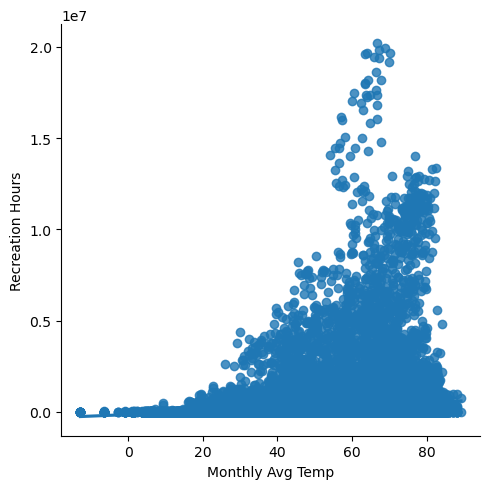

In [26]:
sns.lmplot(x = 'Monthly Avg Temp', y = 'Recreation Hours', data = df_nps_noaa)

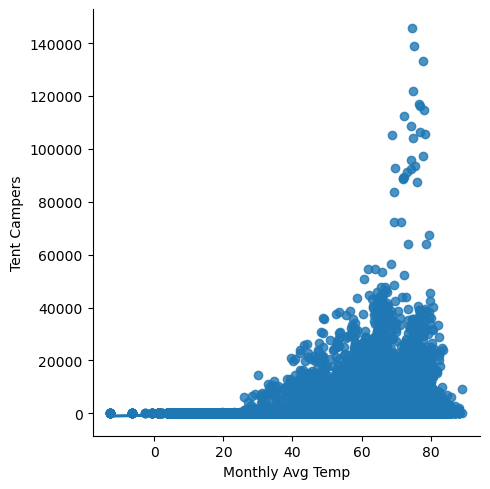

In [27]:
sns.lmplot(x = 'Monthly Avg Temp', y = 'Tent Campers', data = df_nps_noaa)

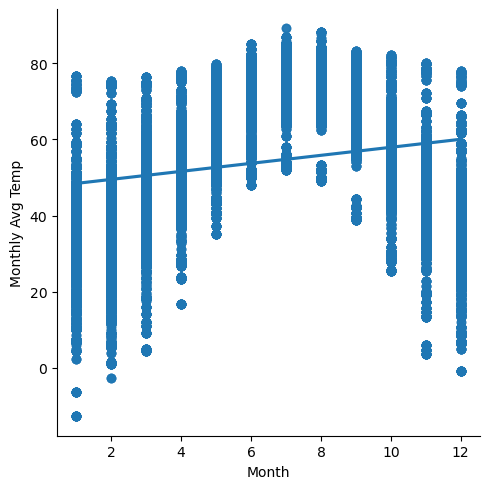

In [28]:
sns.lmplot(x = 'Month', y = 'Monthly Avg Temp', data = df_nps_noaa)

Hypothesis to test: As monthly average temperature increaes the number of tent campers also increases.

In [29]:
X = df_nps_noaa['Monthly Avg Temp'].values.reshape(-1,1)
y = df_nps_noaa['Tent Campers'].values.reshape(-1,1)

In [30]:
X

array([[30.2],
       [30.2],
       [30.2],
       ...,
       [56.8],
       [41. ],
       [37. ]])

In [31]:
y

array([[ 0],
       [ 0],
       [56],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=int64)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 06. Regression Analysis

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
y_predicted = regression.predict(X_test)

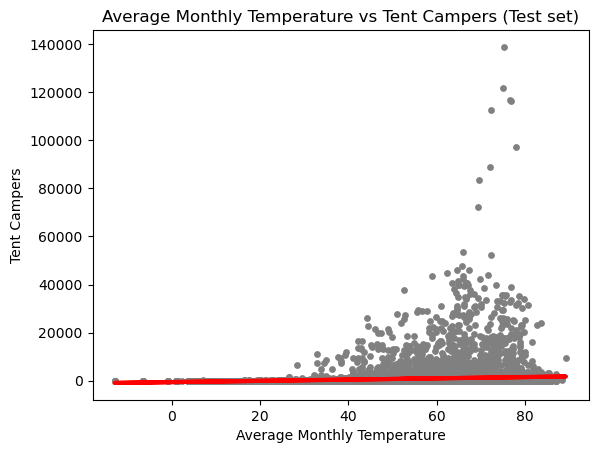

In [37]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average Monthly Temperature vs Tent Campers (Test set)')
plot_test.xlabel('Average Monthly Temperature')
plot_test.ylabel('Tent Campers')
plot_test.show()

I do not believe this regression line accurately represents the trends. To the naked eye, there appears to be a curve in the line. Therefore, the trend is not linear and it is more likely logarithmic. Additionally, there are a number of 0 values that might be skewing the data lower.

In [38]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [39]:
rmse

20043862.905580062

In [40]:
r2

0.013594721350417172

In [43]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,0,713.032476
1,783,1460.602792
2,0,815.331572
3,0,896.646238
4,0,652.702240


This regression analysis was wildly inaccurate. I believe there were two many 0 values to accurately analyze the information. I am going, to rerun this analysis without the 0's.

## 07. Rerunning Regression without 0's

In [44]:
df_camping = df_nps_noaa[df_nps_noaa['Tent Campers']>0]

In [45]:
df_camping.shape

(9906, 20)

In [46]:
X2 = df_camping['Monthly Avg Temp'].values.reshape(-1,1)
y2 = df_camping['Tent Campers'].values.reshape(-1,1)

In [47]:
X2

array([[30.2],
       [39.1],
       [47.9],
       ...,
       [65.8],
       [58.4],
       [47. ]])

In [48]:
y2

array([[ 56],
       [132],
       [ 92],
       ...,
       [414],
       [420],
       [180]], dtype=int64)

In [49]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [50]:
regression.fit(X2_train, y2_train)

LinearRegression()

In [51]:
y2_predicted = regression.predict(X2_test)

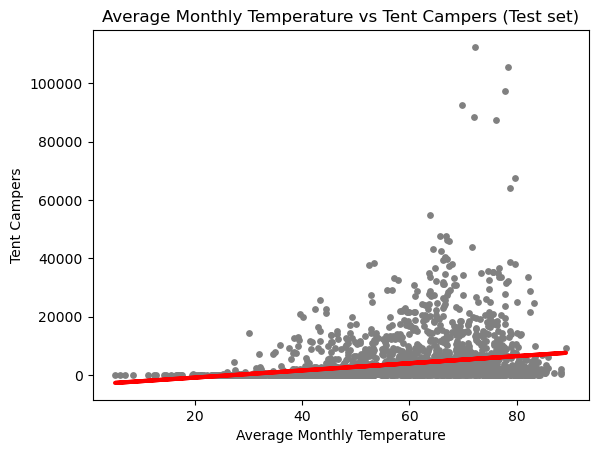

In [52]:
plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Average Monthly Temperature vs Tent Campers (Test set)')
plot_test.xlabel('Average Monthly Temperature')
plot_test.ylabel('Tent Campers')
plot_test.show()

This graph looks slightly more accurate, however it still does not look like a fully accurate prediction. In this version of the chart, the curve of the points is more noticeable. Thinking about the data it makes sense that this would be a logarithmic pattern more than a linear one. Higher temperatures are only desirable to a certain degree. If this pattern were linear 120 degrees would be more desirable for camping than 75 degrees. 

In [53]:
rmse2 = mean_squared_error(y2_test, y2_predicted)
r2_2 = r2_score(y2_test, y2_predicted)

In [54]:
rmse2

59611822.04092514

In [55]:
r2_2

0.04768075383002068

In [56]:
data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data2.head()

,Actual,Predicted
0,11,6093.943598
1,12597,5566.181644
2,1672,2117.318637
3,238,6707.620290
4,779,5762.558185


Removing the zeros from the data set made the linear regression analysis slightly more accurate, however it is still not accurate enough to consider using. Some form of exponential analysis must be used for finding a pattern in this data and not a linear regression model. 